Projeto: Análise de Correspondência entre Perfil de Investidor e Tipo de Aplicação

Objetivo:
Avaliar se existe associação entre o perfil de investidor (Conservador, Moderado, Agressivo) e o tipo de aplicação financeira (Ações, CDB, Poupança), identificando padrões de comportamento e visualizando essas relações por meio de um mapa fatorial.

Método aplicado:
Foi utilizada a Análise de Correspondência (CA), técnica indicada para variáveis categóricas. O processo incluiu: criação da tabela de contingência, teste de independência Qui-Quadrado, cálculo dos autovalores e inércia explicada, extração das coordenadas fatoriais e construção do mapa fatorial.

Dataset:
Base Perfil Aplicação.xlsx, contendo 100 registros com as variáveis: Estudante, Perfil e Tipo de Aplicação. A tabela de contingência gerada serviu como entrada para a análise.

### 1. Importação de Bibliotecas

In [24]:
#Importação das bibliotecas

import pandas as pd
import prince
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Formatação de Tabelas e Estilo Visual

In [2]:
# Configurações
pd.set_option('display.float_format', lambda x: '%.4f' % x)
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True, precision=6)
pd.set_option("display.float_format", "{:.6f}".format)

### Funções auxiliares

In [ ]:
# Funções auxiliares

#Elaborando mapa fatorial
def plot_ca(ca, tabela, dim_x=0, dim_y=1, figsize=(10,10)):
    """
    Gera o gráfico (mapa fatorial) de uma Análise de Correspondência (CA).
    
    Parâmetros:
        ca: objeto ajustado prince.CA()
        tabela: tabela de contingência usada no fit()
        dim_x: componente do eixo X (default = 0)
        dim_y: componente do eixo Y (default = 1)
        figsize: tamanho da figura
    """

    # Coordenadas das linhas (categorias da primeira variável)
    row_coords = ca.row_coordinates(tabela)
    # Coordenadas das colunas (categorias da segunda variável)
    col_coords = ca.column_coordinates(tabela)

    plt.figure(figsize=figsize)

    # --- Plotagem das linhas ---
    plt.scatter(row_coords.iloc[:, dim_x], row_coords.iloc[:, dim_y], label="Linhas", color="blue")
    for i, label in enumerate(row_coords.index):
        plt.text(row_coords.iloc[i, dim_x], row_coords.iloc[i, dim_y], label, color="blue")

    # --- Plotagem das colunas ---
    plt.scatter(col_coords.iloc[:, dim_x], col_coords.iloc[:, dim_y], label="Colunas", color="red")
    for i, label in enumerate(col_coords.index):
        plt.text(col_coords.iloc[i, dim_x], col_coords.iloc[i, dim_y], label, color="red")

    # Linhas de referência
    plt.axhline(0, color='grey', linewidth=0.7)
    plt.axvline(0, color='grey', linewidth=0.7)

    # Títulos e rótulos
    plt.xlabel(f"Dimensão {dim_x + 1}")
    plt.ylabel(f"Dimensão {dim_y + 1}")
    plt.title("Mapa Fatorial - Análise de Correspondência (CA)")
    plt.legend()
    plt.grid(False)
    plt.show()

### 2. Carregar Base de Dados

In [3]:
# Importar o banco de dados
## Fonte: Fávero e Belfiore (2017, Capítulo 11)

df = pd.read_excel("Perfil Aplicação.xlsx")
print(df.head())

     Estudante       Perfil Tipo de Aplicação
0     Gabriela  Conservador          Poupança
1  Luiz Felipe  Conservador          Poupança
2     Patrícia  Conservador          Poupança
3      Gustavo  Conservador          Poupança
4      Letícia  Conservador          Poupança


### Visualizando os dados e cada uma das variáveis

In [4]:
#print(df, "\n") # Visualizar os dados e quebra de linha

print(df.info()) # Retornar os tipos/formato dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estudante          100 non-null    object
 1   Perfil             100 non-null    object
 2   Tipo de Aplicação  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB
None


In [ ]:
#Visualizando as estatítiscas univariadas

df.describe()
 

,Estudante,Perfil,Tipo de Aplicação
count,100,100,100
unique,100,3,3
top,Gabriela,Agressivo,Ações
freq,1,58,45


# ETL: Transformações de Dados

In [ ]:
# Criando a tabela de contingência

tabela = pd.crosstab(df["Perfil"], df["Tipo de Aplicação"])

print(tabela)


Tipo de Aplicação  Ações  CDB  Poupança
Perfil                                 
Agressivo             36   20         2
Conservador            5    4         8
Moderado               4   16         5


Analisando a significância estatística da associação (teste qui²)


In [9]:
# Analisando a significância estatística da associação (teste qui²)

chi2, pvalor, df, freq_esp = chi2_contingency(tabela)

print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df}") # graus de liberdade

estatística qui²: 31.764164976335362
p-valor da estatística: 2.137594051381398e-06
graus de liberdade: 4


Regra de decisão:
p-valor < 0.05 → rejeitamos H0 → há associação entre as variáveis
p-valor ≥ 0.05 → não rejeitamos H0 → não há evidência de associação

Conclusão: p-valor < 0.05, rejeitamos H0 → há associação entre as variáveis. concluímos que p perfil de investidor influencia o tipo de investimento escolhido. Podemos seguir com a análise

In [ ]:
# Elaborando a ANACOR

# Inicializando a instância da Anacor
#Essa função ajusta o modelo com a tabela de contingência
#Calcular coordenadas
#Gerar autovalores e inércia

ca = prince.CA()

In [11]:
# Ajustes do dataframe

# Renomeando as linhas e colunas do dataframe

tabela.columns.rename('Investimento', inplace=True)
tabela.index.rename('Perfil', inplace=True)

print(tabela)


Investimento  Ações  CDB  Poupança
Perfil                            
Agressivo        36   20         2
Conservador       5    4         8
Moderado          4   16         5


In [12]:
# Fit do modelo

# Note que o input é a tabela de contingência criada antes

ca = ca.fit(tabela)

In [ ]:
# Obtendo as coordenadas em linha e coluna
# Cada categoria ganha uma posição no espaço.
# quem está perto de quem
# quem está longe
# quem se opõe
# qual é o eixo principal de contraste

print(ca.row_coordinates(tabela), "\n")
print(ca.column_coordinates(tabela))

                    0         1
Perfil                         
Agressivo   -0.396262 -0.065513
Conservador  0.786648 -0.433800
Moderado     0.384408  0.446974 

                     0         1
Investimento                    
Ações        -0.404692 -0.209522
CDB           0.071019  0.353291
Poupança      1.024690 -0.313542


In [17]:
# Obtendo os eigenvalues

print("Eigenvalues:", ca.eigenvalues_)


Eigenvalues: [0.233215 0.084427]


In [18]:
# Obtendo a inércia principal total

# É a soma dos eigenvalues (também é a divisão: estat. qui² / N)
# Quanto maior a inércia principal total, maior é a associação entre categorias

print("Inércia total:", ca.total_inertia_)

Inércia total: 0.3176416497633535


In [ ]:
# Inércia explicada por dimensão (%)
# A inércia representa a “variância” ou “informação” explicada.

inercia_explicada = ca.eigenvalues_ / ca.total_inertia_
print("Inércia explicada por dimensão:", inercia_explicada)

Inércia explicada por dimensão: [0.734207 0.265793]


In [ ]:
# Massas em colunas
# As massas são as proporções de cada categoria em relação ao total geral da tabela de contingência.
print(ca.col_masses_)


Ações      0.450000
CDB        0.400000
Poupança   0.150000
dtype: float64


Resultado Masas em colunas:

45% de todas as observações da tabela estão na categoria Ações  
40% das observações estão na categoria CDB  
15% das observações estão na categoria Poupança

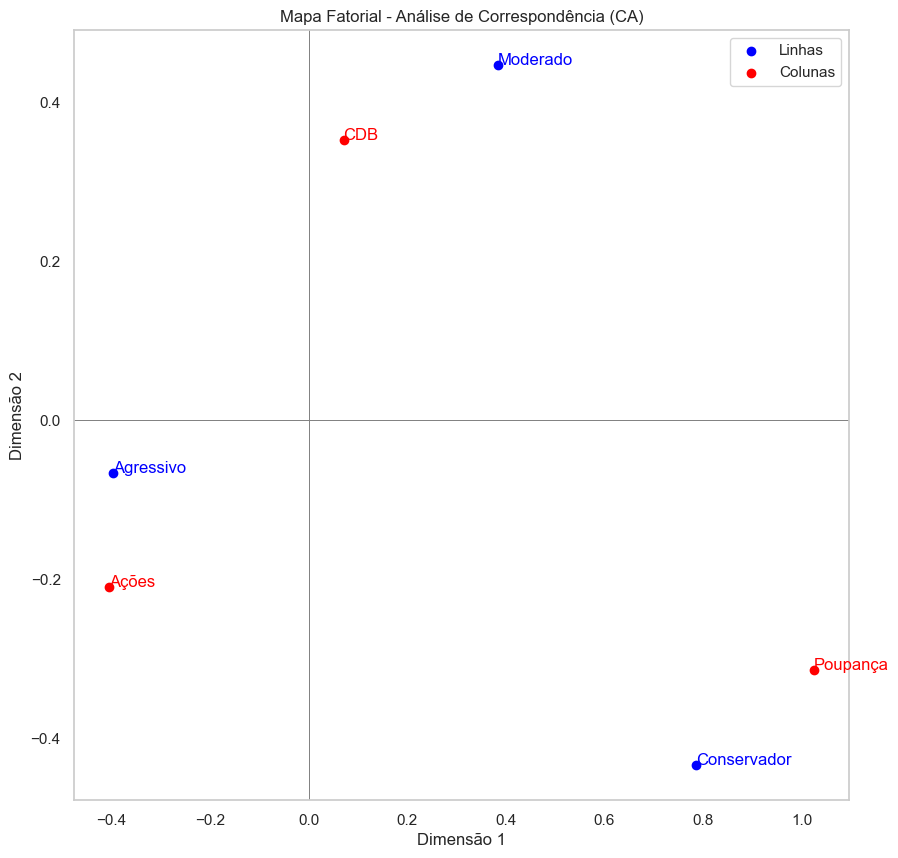

In [ ]:
# Gerando mapa fatorial

ca = prince.CA(n_components=2)
ca = ca.fit(tabela)

plot_ca(ca, tabela)

Conclusão

A Análise de Correspondência evidenciou uma relação clara entre o perfil do investidor e o tipo de produto financeiro escolhido. Os resultados mostram que investidores conservadores tendem a se associar fortemente à Poupança, refletindo sua preferência por segurança e baixa volatilidade. Investidores moderados demonstram maior proximidade com CDBs, que oferecem equilíbrio entre risco e retorno. Já os investidores agressivos apresentam associação direta com Ações, indicando maior tolerância ao risco em busca de ganhos superiores.

A Dimensão 1 do mapa fatorial caracteriza-se como um eixo de Risco vs. Segurança, separando nitidamente perfis conservadores de perfis agressivos. A Dimensão 2 diferencia nuances dentro dos níveis de risco, especialmente entre moderados e conservadores. De forma geral, a análise confirma padrões coerentes de comportamento e destaca a consistência entre perfil de risco e escolha de investimento.